## Download data from here:

https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


chest_xray_data/
├── train/
│   ├── NORMAL/
│   └── PNEUMONIA/
├── val/
│   ├── NORMAL/
│   └── PNEUMONIA/
└── test/
    ├── NORMAL/
    └── PNEUMONIA/

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

2025-05-15 21:19:15.698381: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-15 21:19:15.705708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747333155.714105  242066 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747333155.716732  242066 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747333155.723347  242066 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [ ]:
# Load data

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "chest_xray_data/train", image_size=IMG_SIZE, batch_size=BATCH_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "chest_xray_data/val", image_size=IMG_SIZE, batch_size=BATCH_SIZE)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "chest_xray_data/test", image_size=IMG_SIZE, batch_size=BATCH_SIZE)

Found 5216 files belonging to 2 classes.


I0000 00:00:1747324484.563324  132615 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9704 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [3]:
# Prefetch for performance

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [4]:
# Model

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/home/amir/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Training

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


I0000 00:00:1747324529.256039  136920 service.cc:152] XLA service 0x7e4a8800a7a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747324529.256056  136920 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-05-15 18:55:29.270030: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747324529.366570  136920 cuda_dnn.cc:529] Loaded cuDNN version 90300


  8/163 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7108 - loss: 1.8450

I0000 00:00:1747324531.124554  136920 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8203 - loss: 0.5452 - val_accuracy: 0.6875 - val_loss: 0.8978
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9679 - loss: 0.0909 - val_accuracy: 0.6875 - val_loss: 0.8338
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9726 - loss: 0.0673 - val_accuracy: 0.8125 - val_loss: 0.3299
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9904 - loss: 0.0323 - val_accuracy: 0.7500 - val_loss: 0.4486
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9881 - loss: 0.0321 - val_accuracy: 0.9375 - val_loss: 0.1505
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9956 - loss: 0.0150 - val_accuracy: 0.8125 - val_loss: 0.3922
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9982 - loss: 0.0080 - val_accuracy: 0.8750 - val_loss: 0.3678
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9988 - loss: 0.0050 - val_accuracy: 0.937

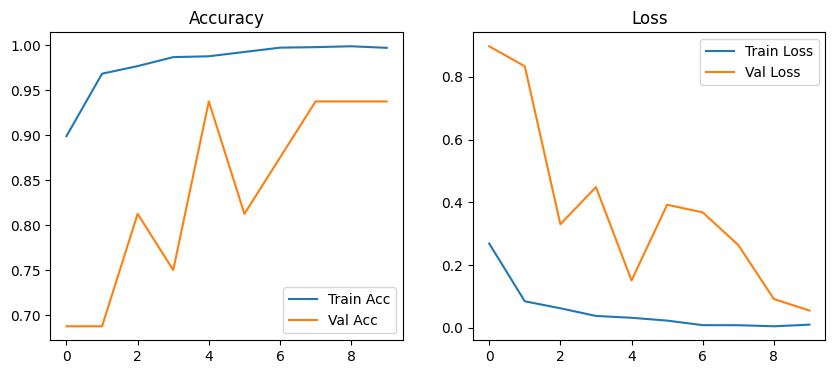

In [6]:
# Plotting

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")
plt.show()

In [7]:
# Evaluation

y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype("int32").flatten())

print(classification_report(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
              precision    recall  f1-score   support

           0       0.97      0.33      0.50       234
           1       0.71      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0

2025-05-15 18:56:13.817549: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


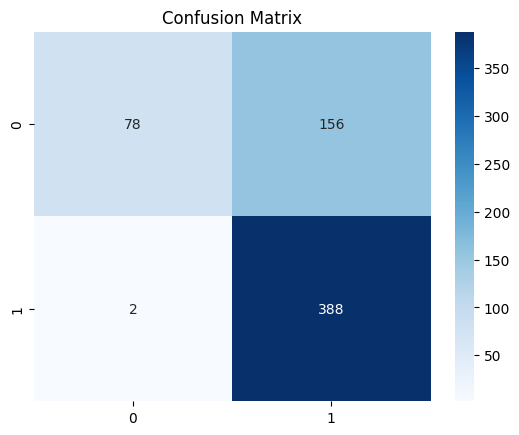

In [8]:
# Confusion Matrix

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()